In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [2]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    x_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(x_in)
    if len(y_pred[0]) > 1:
        print('Multiclass')
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print('Binary')
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

## Binary classification

In [4]:
N = 1000
X, y = make_circles(N, noise=0.03, random_state=42)

In [5]:
X.shape, y.shape

((1000, 2), (1000,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1),
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, verbose=0)

In [8]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0168 - accuracy: 1.0000


[0.01683126389980316, 1.0]

Binary


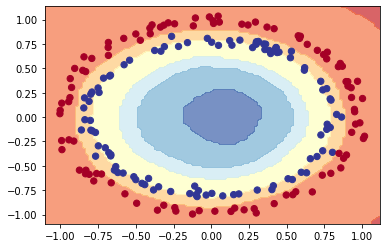

In [9]:
plot_decision_boundary(model, X_test, y_test)

## Multi-class classification

In [10]:
url = "https://raw.githubusercontent.com/GokuMohandas/MadeWithML/main/datasets/spiral.csv"
df = pd.read_csv(url, header=0)
X = df[["X1", "X2"]].values
y_str = df["color"].values
label_dict = {'c1':0, 'c2':1, 'c3':2}
y = np.array([label_dict[i] for i in y_str])
y = pd.get_dummies(y)

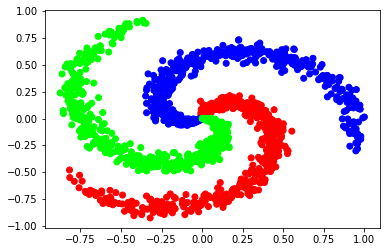

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1200, 2), (300, 2), (1200, 3), (300, 3))

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
])

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, verbose=0)

In [14]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 722us/step - loss: 0.0166 - accuracy: 0.9967


[0.016579704359173775, 0.996666669845581]

Multiclass


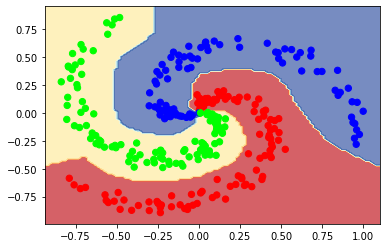

In [15]:
plot_decision_boundary(model, X_test, y_test)